In [1]:
import pandas as pd

from sklearn.datasets import load_iris
iris=load_iris()

type(iris)

sklearn.utils.Bunch

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df['class'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

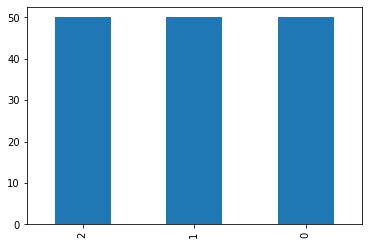

In [8]:
iris_df['class'].value_counts().plot.bar()

In [9]:
X = iris_df.drop('class', axis=1)
y = iris_df['class']

In [10]:
#split our dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state =21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4) #K value 
knn.fit(X_train,y_train)
y_test_knn = knn.predict(X_test)

from sklearn import metrics
print('Accuracy Score for test data in KNN model is:')
print(metrics.accuracy_score(y_test,y_test_knn))

Accuracy Score for test data in KNN model is:
0.9333333333333333


In [12]:
from sklearn.metrics import classification_report
print("Classification report for the test data:")
print("----------------------------------------")
print(classification_report(y_test,y_test_knn))

Classification report for the test data:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



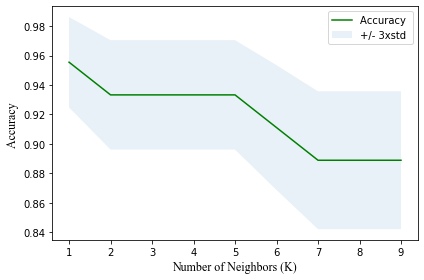

In [13]:
import numpy as np
import matplotlib.pyplot as plt
Ks=10
acc_mean=np.zeros((Ks-1))
acc_std=np.zeros((Ks-1))
Cmat=[]
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc_mean[n-1]=metrics.accuracy_score(y_test,yhat)

    acc_std[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
with open('KNN_kvalue.txt','a') as f:
    print(acc_mean,file=f)
    print('The best accuracy was with: ', acc_mean.max(), 'with k= ',acc_mean.argmax()+1,file=f)

#Plot of k values vs accuracy #
plt.figure()
plt.plot(range(1,Ks),acc_mean,'g')
plt.fill_between(range(1,Ks),acc_mean - 1 * acc_std,acc_mean + 1 * acc_std, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ',fontname='Times New Roman',fontsize=12)
plt.xlabel('Number of Neighbors (K)',fontname='Times New Roman',fontsize=12)
plt.tight_layout()
plt.show()

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_test_LR = logreg.predict(X_test)

from sklearn import metrics
print('Accuracy Score for test data in LR model is:')
print(metrics.accuracy_score(y_test,y_test_LR))

Accuracy Score for test data in LR model is:
0.9333333333333333


## Decision Tree Algorithm

In [16]:
horse_df = pd.read_csv("horse.csv")

In [17]:
horse_df.shape

(299, 28)

In [18]:
horse_df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [19]:
horse_df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [20]:
horse_df.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

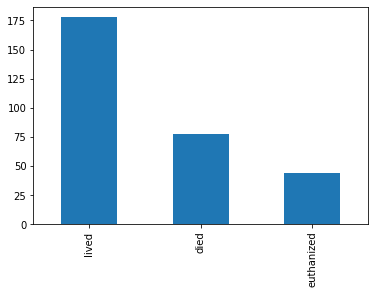

In [21]:
horse_df.outcome.value_counts().plot.bar()

In [22]:
category_variables = ['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
     'abdomen','abdomo_appearance', 'surgical_lesion','cp_data']

# perform one hot encoding on various features in my dataset

horse_encoded_df = pd.get_dummies(horse_df[category_variables])

horse_encoded_df.shape

(299, 56)

In [23]:
## perform label encoding on the target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(horse_df["outcome"])

In [24]:
y

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [25]:
horse_df["outcome"]

0            died
1      euthanized
2           lived
3            died
4            died
          ...    
294    euthanized
295    euthanized
296          died
297         lived
298    euthanized
Name: outcome, Length: 299, dtype: object

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( horse_encoded_df , y, test_size=0.2,
                                                     random_state = 21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 56)
(239,)
(60, 56)
(60,)


In [27]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() #instantiating the estimator object 
dt_model.fit(X_train,y_train)
y_predict = dt_model.predict(X_test)

## Evaluating classification model

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.6833333333333333


In [30]:
y_pred_train = dt_model.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.99581589958159


## Prune our decision tree to avoid overfitting

In [31]:
dt_prune = DecisionTreeClassifier(max_depth=4) #instantiating the estimator object 
dt_prune.fit(X_train,y_train)
y_predict = dt_prune.predict(X_test)

In [32]:
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.5833333333333334


In [33]:
y_pred_train = dt_prune.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.7447698744769874
